In [75]:
import xarray
import os
import pandas as pd
import Preprocessing_test
import importlib
importlib.reload(Preprocessing_test)

extractor = Preprocessing_test.FileExtractor()

df_dwd_hornsea = extractor.combine_files("data", "dwd_icon_eu_hornsea")
df_dwd_pes = extractor.combine_files("data", "dwd_icon_eu_pes10")
df_dwd_demand = extractor.combine_files("data", "dwd_icon_eu_demand")

ncep_gfs_hornsea = extractor.combine_files("data", "ncep_gfs_hornsea")
ncep_gfs_pes = extractor.combine_files("data", "ncep_gfs_pes10")
ncep_gfs_demand = extractor.combine_files("data", "ncep_gfs_demand")

preprocesser = Preprocessing_test.Preprocessing()

In [7]:
# df_dwd_hornsea = preprocesser.clean_geo_data(df_dwd_hornsea)
# ncep_gfs_hornsea = preprocesser.clean_geo_data(ncep_gfs_hornsea)
# df_dwd_pes = preprocesser.clean_geo_data(df_dwd_pes)
# ncep_gfs_pes = preprocesser.clean_geo_data(ncep_gfs_pes)
# df_dwd_demand = preprocesser.clean_geo_data(df_dwd_demand)
# ncep_gfs_demand = preprocesser.clean_geo_data(ncep_gfs_demand)

In [76]:


df_dwd_hornsea = preprocesser.preprocess_geo_data(df_dwd_hornsea)
ncep_gfs_hornsea = preprocesser.preprocess_geo_data(ncep_gfs_hornsea)
# df_dwd_pes = preprocesser.preprocess_geo_data(df_dwd_pes)
# ncep_gfs_pes = preprocesser.preprocess_geo_data(ncep_gfs_pes)
# df_dwd_demand = preprocesser.preprocess_geo_data(df_dwd_demand)
# ncep_gfs_demand = preprocesser.preprocess_geo_data(ncep_gfs_demand)

In [74]:
import importlib
importlib.reload(Preprocessing_test)

preprocesser = Preprocessing_test.Preprocessing()

In [77]:
merged_hornsea = preprocesser.merge_weather_stations_data(df_dwd_hornsea, ncep_gfs_hornsea, weighted_average=False)

In [78]:
merged_hornsea_weighted = preprocesser.merge_weather_stations_data(df_dwd_hornsea, ncep_gfs_hornsea)

In [83]:
merged_hornsea =  merged_hornsea.resample("30min").mean().interpolate("time")

In [84]:
merged_hornsea_weighted = merged_hornsea_weighted.resample("30min").mean().interpolate("time")

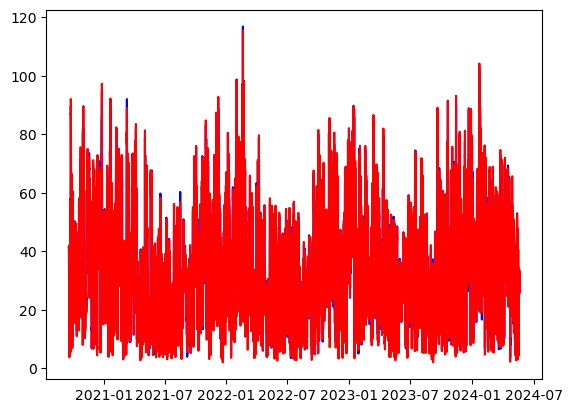

In [88]:
import matplotlib.pyplot as plt

plt.plot(merged_hornsea.index, merged_hornsea["wind_speed_100"], color="blue")
plt.plot(merged_hornsea_weighted.index, merged_hornsea_weighted["wind_speed_100"], color="red")

In [22]:
def weighted_mean_aggregation(df):
    """weighted aggregation based on forecast horizon"""
    
    # adding 0.1 to not divide with 0
    df['weight'] = 1 / (df['forecast_horizon'] + 1)
    
    # Numerische Spalten, die aggregiert werden sollen (ohne 'forecast_horizon' und 'weight')
    numeric_cols = df.select_dtypes(include='number').columns.difference(['weight'])
    
    # # Berechnung gewichteter Mittelwert für jede Spalte
    weighted_agg = df.groupby('val_time').apply(
        lambda x: pd.Series({
            col: (x[col] * x['weight']).sum() / x['weight'].sum() for col in numeric_cols
        })
    )
    
    return weighted_agg

In [44]:
df_dwd_hornsea.groupby("val_time").mean().reset_index()

,val_time,ref_time,rel_hum,temp,wind_dir,wind_dir_100,wind_speed,wind_speed_100,forecast_horizon,temp_mean,...,wind_speed_altitude_diff,temp_range,sin_month,cos_month,sin_day,cos_day,sin_dayofweek,cos_dayofweek,sin_hour,cos_hour
0,2020-09-20 00:00:00+00:00,2020-09-20 00:00:00+00:00,85.213745,15.416670,61.588081,62.085178,36.157055,42.489372,0.0,14.992006,...,6.332317,1.872955,-0.866025,-0.5,-0.743145,-0.669131,-0.781831,0.62349,0.000000,1.000000
1,2020-09-20 01:00:00+00:00,2020-09-20 00:00:00+00:00,84.810768,15.408349,60.819256,61.368774,35.162807,41.382118,1.0,14.992006,...,6.219311,1.872955,-0.866025,-0.5,-0.743145,-0.669131,-0.781831,0.62349,0.104528,0.965926
2,2020-09-20 02:00:00+00:00,2020-09-20 00:00:00+00:00,83.904999,15.494086,60.202801,60.853306,34.180668,40.367599,2.0,14.992006,...,6.186932,1.872955,-0.866025,-0.5,-0.743145,-0.669131,-0.781831,0.62349,0.207912,0.866025
3,2020-09-20 03:00:00+00:00,2020-09-20 00:00:00+00:00,82.977676,15.459883,56.277557,57.054367,34.038715,40.089180,3.0,14.992006,...,6.050465,1.872955,-0.866025,-0.5,-0.743145,-0.669131,-0.781831,0.62349,0.309017,0.707107
4,2020-09-20 04:00:00+00:00,2020-09-20 00:00:00+00:00,82.238251,15.506005,54.625362,55.247120,34.255447,40.516171,4.0,14.992006,...,6.260723,1.872955,-0.866025,-0.5,-0.743145,-0.669131,-0.781831,0.62349,0.406737,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31853,2024-05-20 21:00:00+00:00,2024-05-19 00:00:00+00:00,87.593483,11.587193,7.955432,10.979227,20.448950,27.326328,45.0,11.786297,...,6.877378,1.207417,0.866025,-0.5,-0.651372,-0.758758,0.000000,1.00000,0.809017,0.707107
31854,2024-05-20 22:00:00+00:00,2024-05-19 00:00:00+00:00,89.367836,11.583415,8.877506,12.428408,19.891165,26.978996,46.0,11.779460,...,7.087831,1.207417,0.866025,-0.5,-0.651372,-0.758758,0.000000,1.00000,0.743145,0.866025
31855,2024-05-20 23:00:00+00:00,2024-05-19 00:00:00+00:00,90.036591,11.627540,10.472622,15.279327,19.711285,27.381041,47.0,11.773528,...,7.669756,1.207417,0.866025,-0.5,-0.651372,-0.758758,0.000000,1.00000,0.669131,0.965926
31856,2024-05-21 00:00:00+00:00,2024-05-19 00:00:00+00:00,90.003967,11.733158,12.881405,19.016842,19.424217,27.882566,48.0,11.771851,...,8.458349,1.207417,0.866025,-0.5,-0.790776,-0.612106,0.781831,0.62349,0.000000,1.000000


In [23]:
weighted_mean = weighted_mean_aggregation(df_dwd_hornsea.head(500))

C:\Users\maxda\AppData\Local\Temp\ipykernel_25916\2460560978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = 1 / (df['forecast_horizon'] + 1)


In [24]:
weighted_mean

,cos_day,cos_dayofweek,cos_hour,cos_month,forecast_horizon,rel_hum,sin_day,sin_dayofweek,sin_hour,sin_month,...,wind_speed_100_mean,wind_speed_100_min,wind_speed_100_range,wind_speed_100_std,wind_speed_altitude_diff,wind_speed_max,wind_speed_mean,wind_speed_min,wind_speed_range,wind_speed_std
val_time,,,,,,,,,,,,,,,,,,,,,
2020-09-20 00:00:00+00:00,-0.669131,0.623490,1.000000e+00,-0.5,0.000000,85.213745,-0.743145,-0.781831,0.000000,-0.866025,...,5.716157,1.229700,10.293304,3.337883,6.332317,9.872610,5.031490,1.186180,8.686430,2.774343
2020-09-20 01:00:00+00:00,-0.669131,0.623490,9.659258e-01,-0.5,1.000000,84.810768,-0.743145,-0.781831,0.104528,-0.866025,...,5.716157,1.229700,10.293304,3.337883,6.219311,9.872610,5.031490,1.186180,8.686430,2.774343
2020-09-20 02:00:00+00:00,-0.669131,0.623490,8.660254e-01,-0.5,2.000000,83.904999,-0.743145,-0.781831,0.207912,-0.866025,...,5.716157,1.229700,10.293304,3.337883,6.186932,9.872610,5.031490,1.186180,8.686430,2.774343
2020-09-20 03:00:00+00:00,-0.669131,0.623490,7.071068e-01,-0.5,3.000000,82.977676,-0.743145,-0.781831,0.309017,-0.866025,...,5.716157,1.229700,10.293304,3.337883,6.050465,9.872610,5.031490,1.186180,8.686430,2.774343
2020-09-20 04:00:00+00:00,-0.669131,0.623490,5.000000e-01,-0.5,4.000000,82.238251,-0.743145,-0.781831,0.406737,-0.866025,...,5.716157,1.229700,10.293304,3.337883,6.260723,9.872610,5.031490,1.186180,8.686430,2.774343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23 05:00:00+00:00,-0.104528,-0.222521,2.588190e-01,-0.5,16.660972,91.196472,-0.994522,0.974928,0.500000,-0.866025,...,7.966240,1.876088,17.178129,3.726755,7.378145,15.118773,6.334580,1.716715,13.402058,3.015127
2020-09-23 06:00:00+00:00,-0.104528,-0.222521,6.123234e-17,-0.5,5.358802,89.985565,-0.994522,0.974928,0.587785,-0.866025,...,9.105730,1.273563,16.749856,3.741095,5.219124,15.099175,7.751008,1.201739,13.897436,3.231338
2020-09-23 07:00:00+00:00,-0.104528,-0.222521,-2.588190e-01,-0.5,9.167387,89.447944,-0.994522,0.974928,0.669131,-0.866025,...,8.893302,1.412029,16.682151,3.698833,4.516412,14.984321,7.491709,1.319431,13.664889,3.133319


In [4]:
df_dwd_hornsea1 = preprocesser.handle_missing_data(df_dwd_hornsea)
ncep_gfs_hornsea1 = preprocesser.handle_missing_data(ncep_gfs_hornsea)
df_dwd_pes1 = preprocesser.handle_missing_data(df_dwd_pes)
ncep_gfs_pes1 = preprocesser.handle_missing_data(ncep_gfs_pes)
df_dwd_demand1 = preprocesser.handle_missing_data(df_dwd_demand)
ncep_gfs_demand1 = preprocesser.handle_missing_data(ncep_gfs_demand)

In [5]:
import plotly.express as px
df_dwd_demand1['lat_lon_combination'] = df_dwd_demand1['latitude'].astype(str) + '_' + df_dwd_demand1['longitude'].astype(str)
df_dwd_demand1 = df_dwd_demand1[df_dwd_demand1.lat_lon_combination == df_dwd_demand1.lat_lon_combination.unique()[0]]
df_dwd_demand1 = df_dwd_demand1[df_dwd_demand1.forecast_horizon <= 10]

px.line(df_dwd_demand1, x="valid_time", y="TotalPrecipitation", color="forecast_horizon")